In [5]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()


In [8]:
# Read the CSV file
df = pd.read_csv("data.csv")
# Display the table
df

,index,ParticipantID,name,sex,studytime,freetime,romantic,Walc,goout,Parents_edu,absences,reason,G3,Pass,PredictedGrade,PredictedRank,StereotypeActivation,Predicted_Pass_PassFailStrategy,Predicted_Pass_RankingStrategy
0,132,1,Anna,F,1,2,no,1,2,4,0,course,15,True,17,4,None,True,True
1,724,1,Michael,M,1,1,no,4,4,4,1,reputation,11,True,10,7,None,True,False
2,637,1,David,M,1,2,no,4,2,2,0,other,11,True,13,6,None,True,True
3,884,1,Brian,M,1,1,no,4,4,3,7,home,9,False,10,8,None,True,False
4,194,1,Jenny,F,2,2,no,1,4,2,0,reputation,14,True,18,3,None,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,68,107,Anna,F,2,1,no,3,3,2,1,reputation,8,False,10,6,CaseBased,True,False
852,101,107,Oliver,M,3,3,yes,1,3,4,0,other,17,True,14,3,CaseBased,True,True
853,518,107,David,M,1,2,yes,1,2,4,7,course,8,False,7,8,CaseBased,False,False
854,111,107,Jenny,F,3,1,no,1,2,3,0,reputation,10,True,16,1,CaseBased,True,True


In [9]:
df['G_diff'] = (df['G3'] - df['PredictedGrade']).abs()


In [10]:
# Extract the features and target variable from the dataframe
X = df[['sex', 'studytime', 'freetime', 'romantic', 'Walc', 'goout', 'Parents_edu', 'absences', 'reason', 'StereotypeActivation']]
y = df['G_diff']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model on the entire dataset
model.fit(X_train, y_train)

DecisionTreeClassifier()

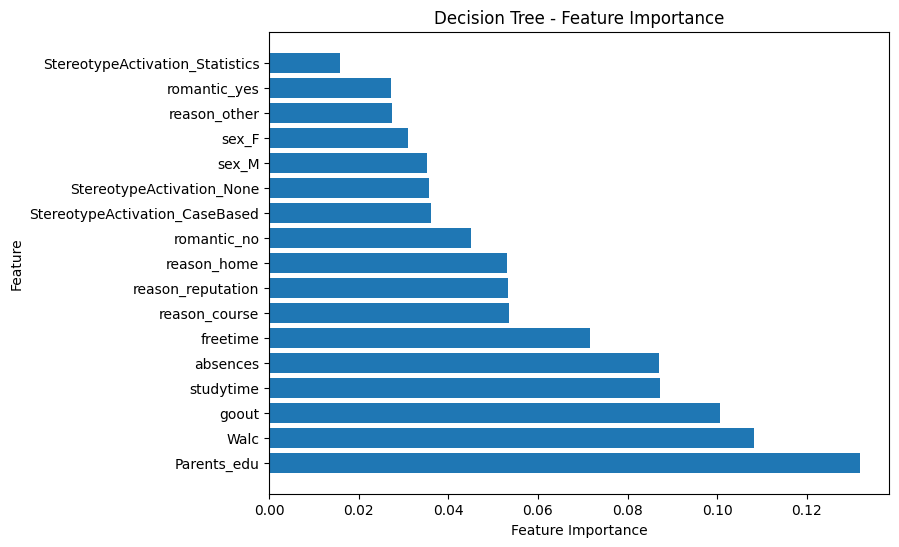

In [13]:

# Get feature importances
feature_importance = model.feature_importances_

# Create a dataframe to display the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the dataframe by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree - Feature Importance')
plt.show()